In [34]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
credit = pd.read_csv("credit_card.csv")#gunakan pandas/pd untuk memasukan dataset
credit.head(10)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [35]:
print("data null \n",credit.isnull().sum())
print("data kosong \n",credit.empty)
print("data nan \n",credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [36]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis=1)  
df_credit.head()  

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

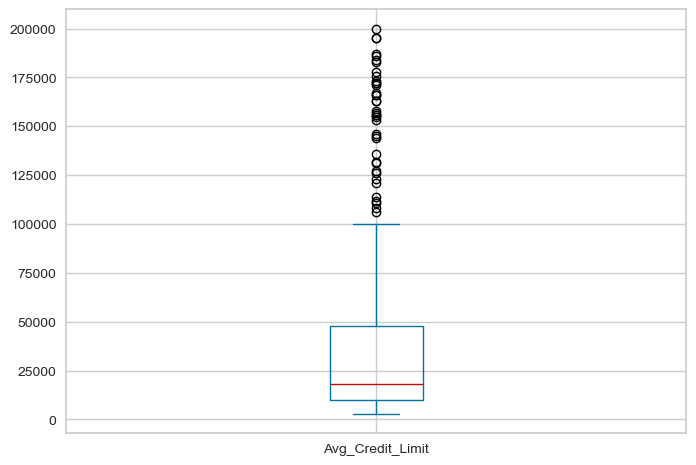

In [37]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah baris DataFrame sebelum dibuang outliner 660
Jumlah baris DataFrame sesudah dibuang outliner 621


<Axes: >

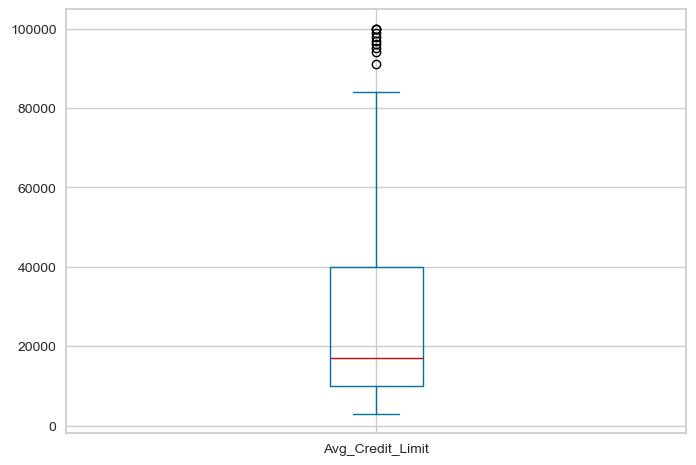

In [38]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(data_frame, kolom_outlier):
        q1 = data_frame[kolom_outlier].quantile(0.25)
        q3 = data_frame[kolom_outlier].quantile(0.75)

        iqr = q3-q1
        batas_atas = q3 + (1.5 * iqr)
        batas_bawah = q1 - (1.5 * iqr)
        
        return data_frame.loc[(data_frame[kolom_outlier] >= batas_bawah) & (data_frame[kolom_outlier] <= batas_atas)]

data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah baris DataFrame sebelum dibuang outliner", df_credit.shape[0])
print("Jumlah baris DataFrame sesudah dibuang outliner", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')

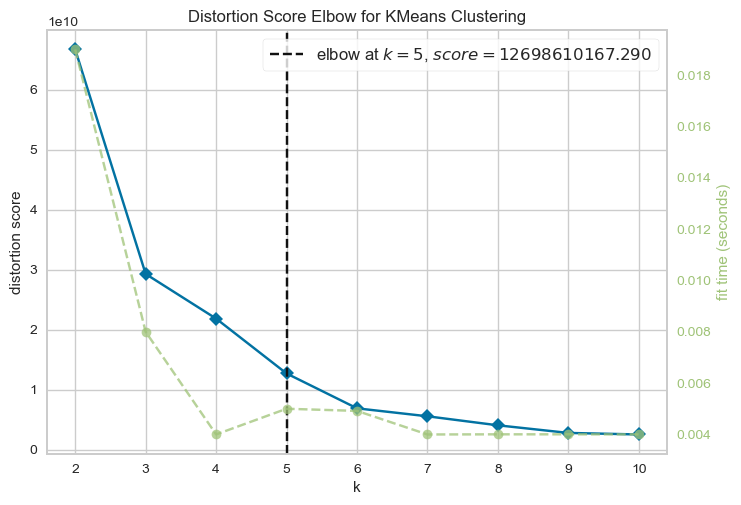

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

KMeansC = KMeans(random_state=58)
vis = KElbowVisualizer(KMeansC, k=(2, 11))
vis.fit(data_bersih)

vis.show()

silhouette score K-Means for  2  cluster : 0.7275517813087928
silhouette score K-Means for  3  cluster : 0.7058100919802311
silhouette score K-Means for  4  cluster : 0.5866654641248105
silhouette score K-Means for  5  cluster : 0.5986950720392292
silhouette score K-Means for  6  cluster : 0.6167122826188297
silhouette score K-Means for  7  cluster : 0.597979323056694
silhouette score K-Means for  8  cluster : 0.5890945232704698
silhouette score K-Means for  9  cluster : 0.6096304412033485
silhouette score K-Means for  10  cluster : 0.5941798049497274


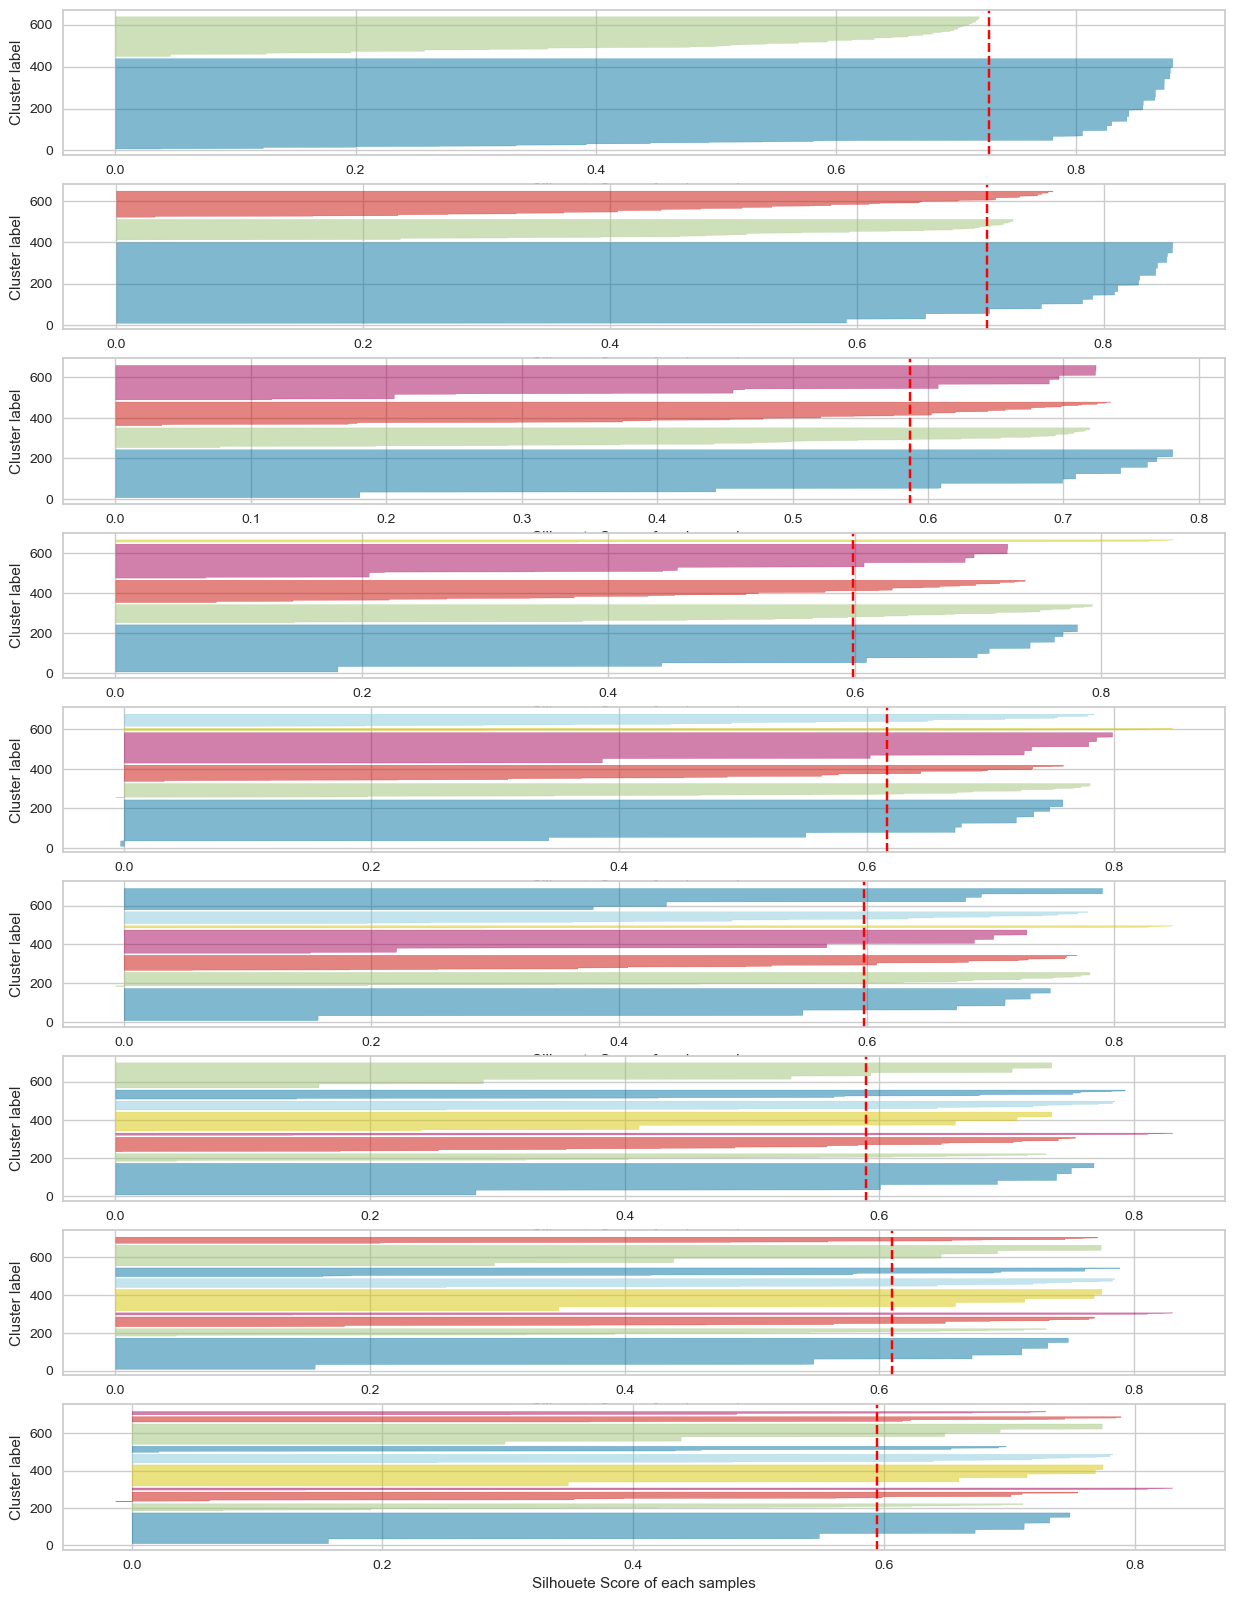

In [40]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9, 1, figsize=(15, 20))

for k in np.arange(2, 11):
    KMeansC = KMeans(n_clusters=k, init='k-means++', random_state=58)
    KM_clusters=KMeansC.fit_predict(data_bersih)
    print("silhouette score K-Means for ", k, " cluster :", silhouette_score(data_bersih, KM_clusters))

    sil_vis = SilhouetteVisualizer(KMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih)

    ax[k-2].set(xlabel = "Silhouete Score of each samples", ylabel="Cluster label")

In [41]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

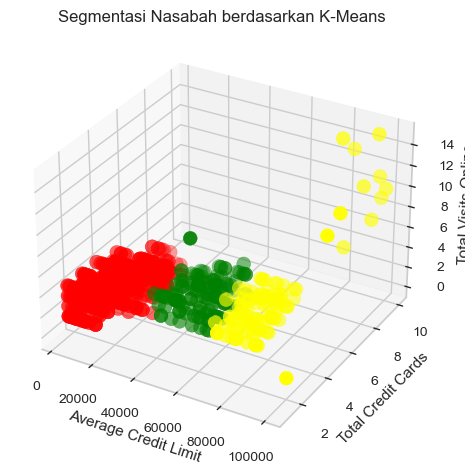

Silhouette Score K-Means: 0.706


In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=3, init='k-means++', random_state=58)
K_clusters = kmeans.fit_predict(data_bersih)  

fig = plt.figure()
ax = plt.axes(projection='3d')


cluster_colors = {0: 'red', 1: 'yellow', 2: 'green'}


ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')  # X-axis label
ax.set_ylabel('Total Credit Cards')   # Y-axis label
ax.set_zlabel('Total Visits Online')  # Z-axis label
plt.show() 


print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, K_clusters))

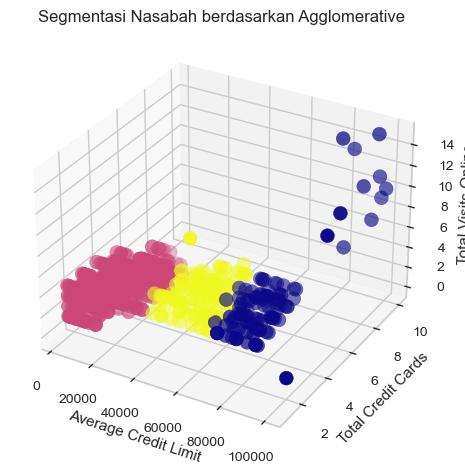

Silhouette Score K-Means: 0.705


In [46]:

import seaborn as sns
from matplotlib.colors import ListedColormap #untuk custom warna cluster

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward' ) 

AGG_clusters = AGG.fit_predict(data_bersih) 

cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex()) #membuat colormap khusus mer

#xx = data yang sudah bersih

fig = plt.figure()
ax = plt. axes(projection='3d')

#sumbu x = "Average Credit Limit", sumbu y = "Total Credit Cards", sumbu z = "Total Visits Or
ax. scatter(data_bersih['Avg_Credit_Limit' ], data_bersih['Total_Credit_Cards' ], data_bersih['Total_visits_online' ],
c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative' )
ax.set_xlabel('Average Credit Limit') #label sumbu x
ax.set_ylabel('Total Credit Cards') #Label sumbu y
ax.set_zlabel('Total Visits Online') #label sumbu z
plt.show() #menampilkan plot


print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, AGG_clusters) )

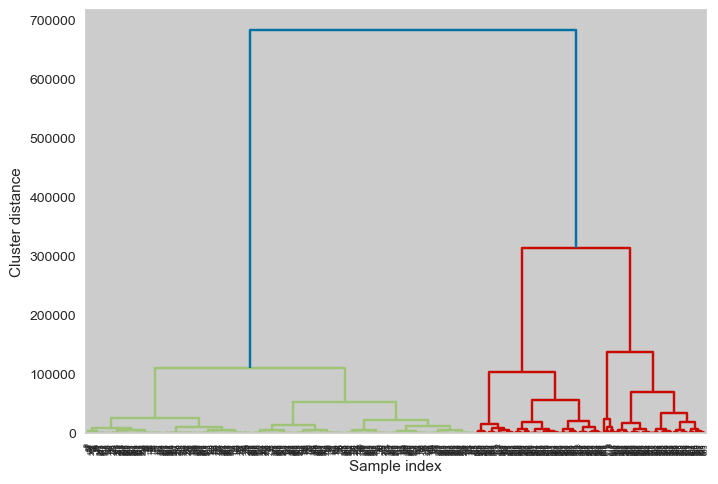

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

n
linkage_array = linkage(data_bersih,method='ward')
dendrogram(linkage_array) #dendogram untuk visualisasi

plt.xlabel("Sample index") 
plt.ylabel("Cluster distance")
plt.show() 

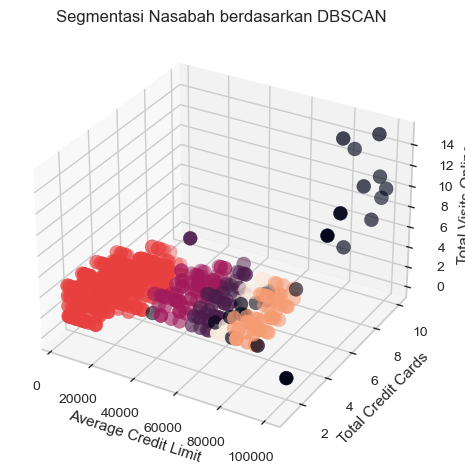

Silhouette Score DBSCAN: 0.657


In [49]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

DBSC = DBSCAN(min_samples=20, eps=2500)
DBSC_clusters = DBSC.fit_predict(data_bersih)

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')

plt.show()

print("Silhouette Score DBSCAN: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))

In [50]:
import pickle

with open('KMeans_model.pkl','wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl','wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl','wb') as r:
    pickle.dump((DBSC),r)

print("Model berhasil disimpan")

Model berhasil disimpan
